Kornpob Bhirombhakdi, kbhirombhakdi@stsci.edu

# Story
We would like to test the accuracy of HSTGRISM. We will test its trace/wavelength mapping with VY2-2.

# Previously
20200911/01 downloaded some data for this analysis, and performed prelim. However, we needed to verify xyd manually therefore we ended the analysis in 01.

# Resources
- paht/to/direct/image/ds9.reg
- 20200911/pidXXXXX/pidXXXXX_hsum.csv


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from hstphot.read_ds9region import read_ds9region
from hstgrism.container import Container
from hstgrism.computexyref import ComputeXYREF
from hstgrism.wfc3irg102 import WFC3IRG102
from hstgrism.show_overview import show_overview
from hstgrism.cutout2d import Cutout2D
from hstgrism.show_bbox import show_bbox


In [11]:
PID = '13580'
OBJ = 'VY2-2'
hsum = pd.read_csv('./pid{0}/pid{0}_hsum.csv'.format(PID))
pair_dg_list = [(5,17),(7,2),(4,14)]
confile = '/Users/kbhirombhakdi/_work/_calib_files/WFC3.IR.G102.cal.V4.32/G102.F098M.V4.32.conf'
beam = 'A'
container_list = []
for i in pair_dg_list:
    sp = hsum[hsum['index']==i[1]].ROOTNAME.values[0]
    sf = sp
    t = Container(sp,sf,'pdf',False)
    container_list.append(t)


/Users/kbhirombhakdi/anaconda3/envs/py3/lib/python3.7/site-packages/hstgrism/container.py:31: UserWarning: Folder ich501b1q already exists. To create a fresh folder, set overwrite = True
  warnings.warn(string)
/Users/kbhirombhakdi/anaconda3/envs/py3/lib/python3.7/site-packages/hstgrism/container.py:31: UserWarning: Folder ich501b9q already exists. To create a fresh folder, set overwrite = True
  warnings.warn(string)
/Users/kbhirombhakdi/anaconda3/envs/py3/lib/python3.7/site-packages/hstgrism/container.py:31: UserWarning: Folder ich501bcq already exists. To create a fresh folder, set overwrite = True
  warnings.warn(string)


In [17]:
xyref_list = []
xyd_list = []
for ii,i in enumerate(pair_dg_list):
    dfile = (hsum[hsum['index']==i[0]].filepath.values[0],1)
    gfile = (hsum[hsum['index']==i[1]].filepath.values[0],1)
    ds9file = '/'.join(hsum[hsum['index']==i[0]].filepath.values[0].split('/')[0:-1]) + '/ds9.reg'
    ds9reg = read_ds9region(ds9file)
    xyd = ds9reg[OBJ] - np.array([1.,1.])
    t = ComputeXYREF(xyd,'default','default',confile,beam,gfile,dfile,container_list[ii])
    t.compute()
    t.save()
    xyref_list.append(t.data['xyref'])
    xyd_list.append(xyd)
    

Save ./ich501b1q/ich501b1q_xyref.csv
Save ./ich501b9q/ich501b9q_xyref.csv
Save ./ich501bcq/ich501bcq_xyref.csv


In [18]:
gobj_list = []
for ii,i in enumerate(pair_dg_list):
    t = WFC3IRG102(confile,beam,xyref_list[ii],container=container_list[ii])
    t.compute()
    t.save()
    gobj_list.append(t)
    

Rescale = False
Perform compute
Rescale = False
Perform compute
Rescale = False
Perform compute
Rescale = False
Perform compute
Save ./ich501b1q/ich501b1q_trace.csv
Rescale = False
Perform compute
Rescale = False
Perform compute
Rescale = False
Perform compute
Rescale = False
Perform compute
Save ./ich501b9q/ich501b9q_trace.csv
Rescale = False
Perform compute
Rescale = False
Perform compute
Rescale = False
Perform compute
Rescale = False
Perform compute
Save ./ich501bcq/ich501bcq_trace.csv


Save ./ich501b1q/ich501b1q_overview.pdf

Save ./ich501b9q/ich501b9q_overview.pdf

Save ./ich501bcq/ich501bcq_overview.pdf



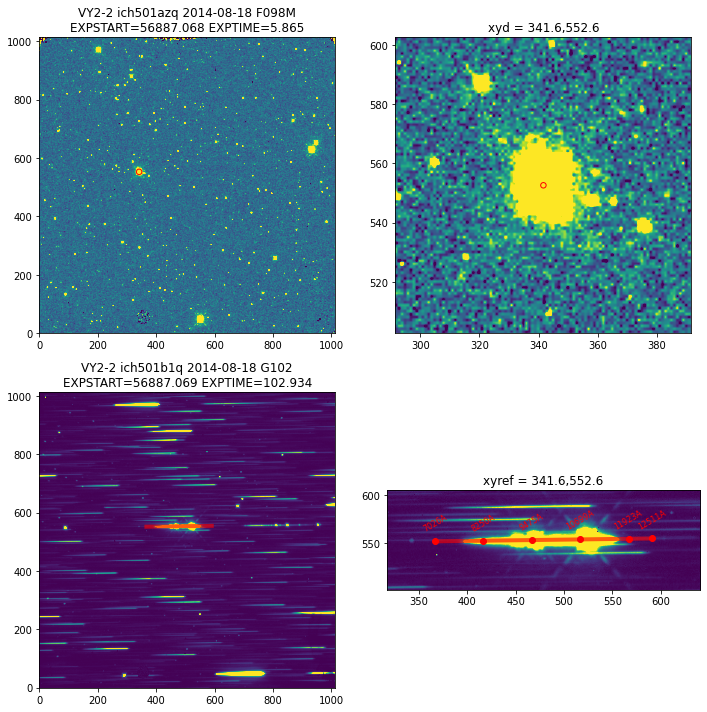

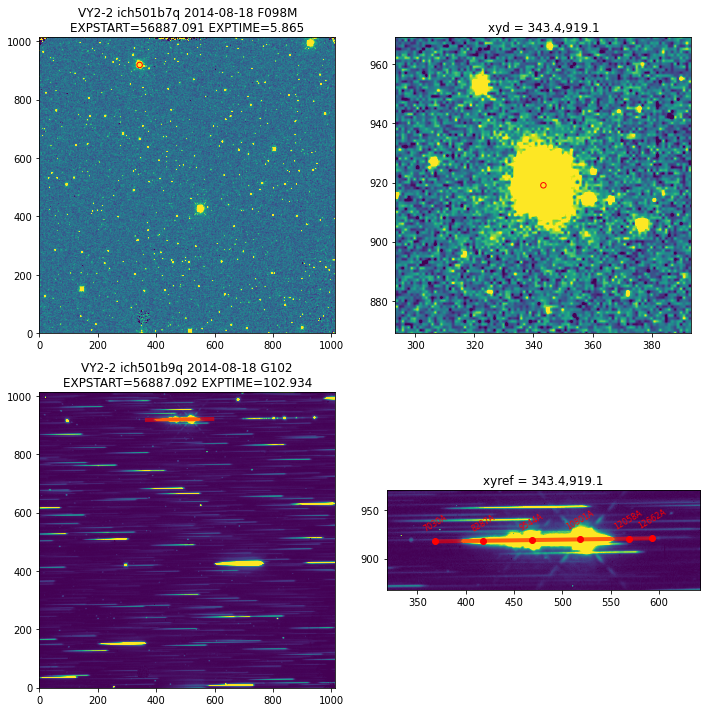

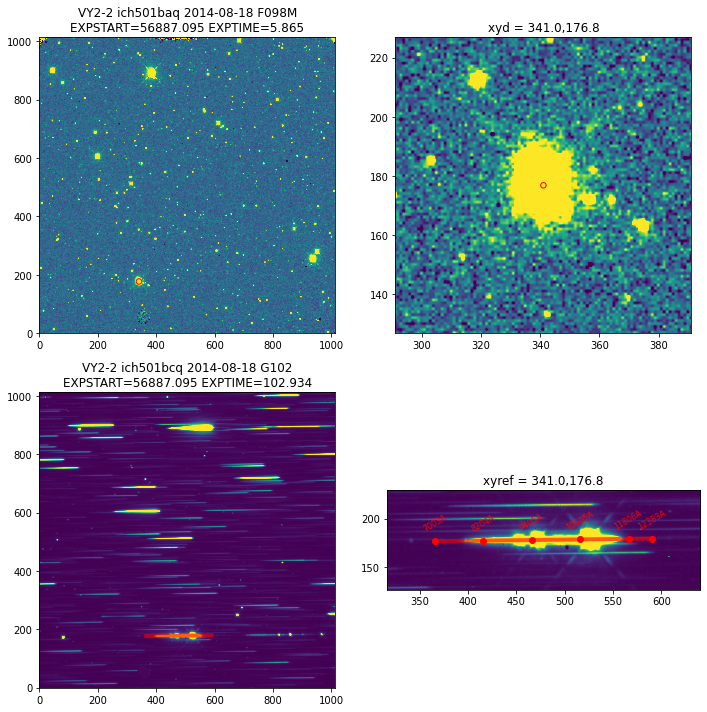

In [22]:
for ii,i in enumerate(pair_dg_list):
    dfile = (hsum[hsum['index']==i[0]].filepath.values[0],1)
    gfile = (hsum[hsum['index']==i[1]].filepath.values[0],1)
    container = container_list[ii]
    save = True
    objname = OBJ
    xyd = xyd_list[ii]
    xh = gobj_list[ii].output['xh']
    yh = gobj_list[ii].output['yh']
    ww = gobj_list[ii].output['ww']
    xyref = xyref_list[ii]
    show_overview(gfile,dfile,xyd,xyref,xh,yh,ww,objname,save,container)
    

In [26]:
halfdy = 10
cutout_list = []
for ii,i in enumerate(pair_dg_list):
    xg = xyref_list[ii][0] + gobj_list[ii].output['xh']
    yg = xyref_list[ii][1] + gobj_list[ii].output['yh']
    halfdyup = halfdy
    halfdylow = halfdy
    tbox = {'xg':xg,'yg':yg,'halfdyup':halfdyup,'halfdylow':halfdylow}
    bbox={'padxleft': 15, 'padxright': 15, 'padyup': 15, 'padylow': 15}
    gfile = (hsum[hsum['index']==i[1]].filepath.values[0],1)
    image = fits.open(gfile[0])[gfile[1]].data
    container = container_list[ii]
    t = Cutout2D(tbox,bbox,image,container)
    t.compute(do_mask=True)
    t.save()
    cutout_list.append(t)
    

Save ./ich501b1q/ich501b1q_tbox.csv
Save ./ich501b1q/ich501b1q_bbox.csv
Save ./ich501b1q/ich501b1q_bbcorner.csv
Save ./ich501b1q/ich501b1q_cutout.fits
Save ./ich501b1q/ich501b1q_mask.fits
Save ./ich501b9q/ich501b9q_tbox.csv
Save ./ich501b9q/ich501b9q_bbox.csv
Save ./ich501b9q/ich501b9q_bbcorner.csv
Save ./ich501b9q/ich501b9q_cutout.fits
Save ./ich501b9q/ich501b9q_mask.fits
Save ./ich501bcq/ich501bcq_tbox.csv
Save ./ich501bcq/ich501bcq_bbox.csv
Save ./ich501bcq/ich501bcq_bbcorner.csv
Save ./ich501bcq/ich501bcq_cutout.fits
Save ./ich501bcq/ich501bcq_mask.fits


Save ./ich501b1q/ich501b1q_bbox.pdf
Save ./ich501b9q/ich501b9q_bbox.pdf
Save ./ich501bcq/ich501bcq_bbox.pdf


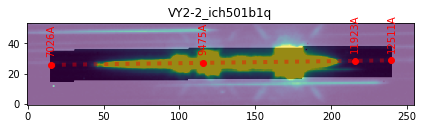

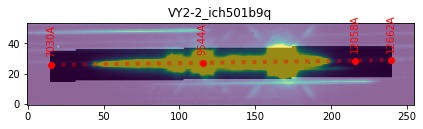

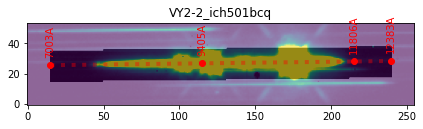

In [41]:
for ii,i in enumerate(pair_dg_list):
    cutoutdata = cutout_list[ii].cutout
    objname = '{0}_{1}'.format(OBJ,hsum[hsum['index']==i[1]].ROOTNAME.values[0])
    maskdata = cutout_list[ii].mask
    do_trace = True
    xcut = xyref_list[ii][0] + gobj_list[ii].output['xh'] - cutout_list[ii].bbcorner['bb0x']
    ycut = xyref_list[ii][1] + gobj_list[ii].output['yh'] - cutout_list[ii].bbcorner['bb0y']
    ww = gobj_list[ii].output['ww']
    save = True
    container = container_list[ii]
    plt.figure()
    show_bbox(cutoutdata=cutoutdata,objname=objname,maskdata=maskdata,do_trace=do_trace,xcut=xcut,ycut=ycut,ww=ww,save=save,container=container)
    

In [59]:
spec_list = []
for ii,i in enumerate(pair_dg_list):
    cutoutdata = cutout_list[ii].cutout
    objname = '{0}_{1}'.format(OBJ,hsum[hsum['index']==i[1]].ROOTNAME.values[0])
    maskdata = cutout_list[ii].mask.astype(float)
    t = (cutoutdata * maskdata).sum(axis=0)
    padxleft = cutout_list[ii].bbox['padxleft']
    padxright = cutout_list[ii].bbox['padxright']
    spec_list.append(t[padxleft:-padxright])
    

Save ./cps.pdf


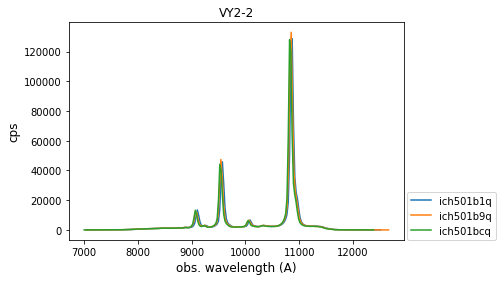

In [63]:
for ii,i in enumerate(pair_dg_list):
    ww = gobj_list[ii].output['ww']
    rootname = hsum[hsum['index']==i[1]].ROOTNAME.values[0]
    plt.plot(ww,spec_list[ii],label=rootname)
plt.xlabel('obs. wavelength (A)',fontsize=12)
plt.ylabel('cps',fontsize=12)
plt.legend(loc=(1.01,0.),fontsize=10)
plt.title(OBJ,fontsize=12)
string = './cps.pdf'
plt.savefig(string,plotformat='pdf',bbox_inches='tight')
print('Save {0}'.format(string))
    

In [64]:
for ii,i in enumerate(pair_dg_list):
    ww = gobj_list[ii].output['ww']
    cps = spec_list[ii]
    rootname = hsum[hsum['index']==i[1]].ROOTNAME.values[0]
    string = './{0}/{1}_cps.csv'.format(container_list[ii].data['savefolder'],container_list[ii].data['saveprefix'])
    t = {'ww':ww,'cps':cps}
    pd.DataFrame(t).to_csv(string)
    print('Save {0}'.format(string))
    

Save ./ich501b1q/ich501b1q_cps.csv
Save ./ich501b9q/ich501b9q_cps.csv
Save ./ich501bcq/ich501bcq_cps.csv


# Summary
We ended here with the records of each pair's cps.csv. Next, we would need line signatures of VY2-2, its zshift (if needed), and a routine to locate lines from cps.csv.
